In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim.corpora as corpora
from pprint import pprint
import os
sns.color_palette("colorblind")

C:\Users\shakshi\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [1]:
import re
import matplotlib.ticker as mtick

In [3]:
from matplotlib.backends.backend_pdf import PdfPages

In [4]:
%load_ext autotime

time: 0 ns (started: 2022-01-31 19:39:54 +02:00)


In [5]:
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shakshi\AppData\Roaming\nltk_data...


time: 203 ms (started: 2022-01-31 19:39:54 +02:00)


[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
# avoid scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

time: 0 ns (started: 2022-01-31 19:39:54 +02:00)


In [7]:
import random

time: 16 ms (started: 2022-01-31 19:39:54 +02:00)


In [ ]:
from hatesonar import Sonar
sonar = Sonar()
#sonar.ping(text="At least I'm not a nigger")

In [8]:
import nltk
import pandas as pd
import chardet

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

time: 16 ms (started: 2022-01-31 19:39:54 +02:00)


In [9]:
from collections import Counter

time: 16 ms (started: 2022-01-31 19:39:54 +02:00)


# entire data

In [10]:
#labeled data from XLNet
vaccine = pd.read_csv('data_forensics_part2_after_followers_count_stemming.csv', encoding = 'latin-1' )

time: 7.41 s (started: 2022-01-31 19:40:02 +02:00)


In [ ]:
vaccine.drop('Unnamed: 0', inplace = True, axis = 1)

In [ ]:
vaccine.info()

In [ ]:
vaccine.isnull().sum()

In [ ]:
len(vaccine['reply_to'][1])

In [ ]:
vaccine = vaccine.mask(vaccine.applymap(str).eq('[]'))

# Wordcloud with TF-IDF

In [ ]:
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
import pandas as pd
import numpy as np
import nltk
import re
import os
nltk.download('wordnet')

In [ ]:
# tokenize
vaccine['token_clean'] =  vaccine['clean'].apply(lambda x: x.split())

In [35]:
vaccine['token_clean'].sample(10)

32663     vic given first pfizer vaccine commitment give...
18265     hi peter #pfizer vaccine effective happen mill...
81061                needs pfizer moderna got trump vaccine
80733     whether progressive dem vile trump ublican thi...
2683      constant waffle trying defend indefensible eve...
113697    right point pfizer put vaccine unsafe ineffect...
37734     #oxford serum institute #vaccine gets green si...
63490     like experts saying get johnson amp johnson al...
31874     die norway receiving pfizer covid vaccine offi...
90510     us th country world approve covid vaccine u k ...
Name: token_clean, dtype: object

time: 16 ms (started: 2022-02-05 15:58:42 +02:00)


In [ ]:
stop = stopwords.words('english')
%vaccine['token_clean'] = vaccine['token_clean'].apply(lambda x: [item for item in x if item not in stop])

In [ ]:
from nltk.stem.porter import * 
lemmatizer = WordNetLemmatizer()
vaccine['stem_clean'] = vaccine['token_clean'].apply(lambda x: [lemmatizer.lemmatize(i) for i in x]) # stemming
stemmer = SnowballStemmer('english')
vaccine['stem_clean'] = vaccine['token_clean'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [ ]:
vaccine['stem_clean'].head()

In [ ]:
# convert list to string
vaccine['string_stem_clean'] = [','.join(map(str, l)) for l in vaccine['stem_clean']]

In [ ]:
# convert list to string
vaccine['token_clean'] = [','.join(map(str, l)) for l in vaccine['token_clean']]

In [ ]:
modals_list = ['can',
'could',
'may',
'might',
'must',
'shall',
'should',
'will',
'would',
'said',
'http',
'https']

In [ ]:
def modals(x):
    m = []
    for w in str(x).split(' '):
        if w not in modals_list:
            m.append(w)
    return " ".join(m)

vaccine['clean_modals'] = vaccine['string_stem_clean'].apply(modals)

In [ ]:
vaccine['string_stem_clean'] = vaccine['string_stem_clean'].apply(lambda x: ' '.join([w for w in str(x).split(',')]))
vaccine['token_clean'] = vaccine['token_clean'].apply(lambda x: ' '.join([w for w in str(x).split(',')]))
vaccine['clean_modals'] = vaccine['clean_modals'].apply(lambda x: ' '.join([w for w in str(x).split(',')]))

In [ ]:
vaccine['string_stem_clean']

In [ ]:
vaccine.to_csv('data_forensics_part2_after_followers_count_stemming.csv')

In [ ]:
misinfo_wordcloud = vaccine[vaccine.labels == 1]['clean_modals']
misinfo_wordcloud.tolist()

In [ ]:
import matplotlib.dates as mdates

# Hashtags distribution

In [ ]:
misinfo_hashtags = pd.DataFrame(vaccine[vaccine['labels'] == 1]['hashtags'].value_counts()).reset_index()
info_hashtags = pd.DataFrame(vaccine[vaccine['labels'] == 0]['hashtags'].value_counts()).reset_index()

# convert list to string
misinfo_hashtags['string_hashtags'] = [''.join(map(str, l)) for l in misinfo_hashtags['index']]
info_hashtags['string_hashtags'] = [''.join(map(str, l)) for l in info_hashtags['index']]

misinfo_hashtags['string_hashtags'] = misinfo_hashtags['string_hashtags'].apply(lambda x: ','.join([w for w in str(x).split(',')]))
info_hashtags['string_hashtags'] = info_hashtags['string_hashtags'].apply(lambda x: ','.join([w for w in str(x).split(',')]))

In [ ]:
# output list
output = []
  
# function used for removing nested 
# lists in python. 
def reemovNestings(l):
    for i in l:
        if type(i) == list:
            reemovNestings(i)
        else:
            output.append(i)
  
reemovNestings(vaccine[vaccine['labels'] == 1]['hashtags'])
#reemovNestings(vaccine[vaccine['labels'] == 1]['hashtags'])

#reemovNestings(output)
set(output)

In [ ]:
misinfo_hashtags = set(output)

In [ ]:
info_hashtags = set(output)

In [ ]:
info_hashtags.intersection(misinfo_hashtags)

In [ ]:
misinfo_hashtags.difference(info_hashtags)

In [ ]:
info_hashtags.difference(misinfo_hashtags)

In [ ]:
pd.DataFrame(vaccine[vaccine['labels'] == 1]['hashtags'].value_counts()).reset_index().head(40)

In [ ]:
vaccine[vaccine['labels'] == 1]['hashtags']

In [ ]:
vaccine['string_hashtags'] = [''.join(map(str, l)) for l in vaccine['hashtags']]

In [ ]:
vaccine['string_hashtags'] = vaccine['hashtags'].apply(lambda x: ' '.join([w for w in str(x).split(',')]))
#s = pd.Series(vaccine['string_hashtags'], dtype = "string")

In [ ]:
vaccine['s'] = [''.join(map(str, l)) for l in s]

In [ ]:
vaccine['string_hashtags'] = vaccine['hashtags'].str.strip('[]').astype(str)

In [ ]:
misinfo_hashtags = vaccine[vaccine.labels == 1]['string_hashtags']
info_hashtags = vaccine[vaccine.labels == 0]['string_hashtags']
misinfo_hashtags.dropna(inplace = True)
info_hashtags.dropna(inplace = True)

In [ ]:
#misinfo
list_of_hashtags = []
def remove_commas(x):
    x = str(x)
    list_of_hashtags.extend(([w for w in x.split(',')]))
#s.apply(lambda x: ','.join([w for w in str(x).split(',')]))
misinfo_hashtags.apply(remove_commas)
#info_hashtags.apply(remove_commas)

In [ ]:
list_of_hashtags1 = []
def remove_commas(x):
    x = str(x)
    list_of_hashtags1.extend(([w for w in x.split(',')]))
#s.apply(lambda x: ','.join([w for w in str(x).split(',')]))
#misinfo_hashtags.apply(remove_commas)
info_hashtags.apply(remove_commas)

In [ ]:
len(list_of_hashtags)

In [ ]:
# present in misinfo (list of hashtags) but not in info
# hashtags - # present in misinfo but not in info
# hashtags - saynotopoisonvaccines, vaccineextortion, astrazenecapoison, pseudoscience, mychoice, factcheckvaccines, gatesfoundation, pfizer_or_nothing, antivaxxers, novaccine4me, nojohnsonnjohnsonvaccine4me, trumpcrimes, trumpvirusdeathtoll240k, trumppandemic, republicans, melindagates,billgatesisevil, untestedvaccine, iwillnotgetvaccinated, constitutionovercoronavirus, logicalfallacy, exclusive, novax4me, caution, abolishbigpharma
set(list_of_hashtags).difference(list_of_hashtags1), antivaxxers, novaccine4me, nojohnsonnjohnsonvaccine4me, trumpcrimes, trumpvirusdeathtoll240k, trumppandemic, republicans, melindagates,billgatesisevil, untestedvaccine, iwillnotgetvaccinated, constitutionovercoronavirus, logicalfallacy, exclusive, novax4me, caution, abolishbigpharma
set(list_of_hashtags).difference(list_of_hashtags1)

In [ ]:
# hashtags for info - # hashtags for info - fullyvaccinated, savetheplanet, healthnews, thisismyshot, getthevaccine, covid19updates, scienceisreal, yestocovid19vaccine, anyvaccine, inthenews, 2ndshot, covid19update, producethevaccine, vaccinatedandproud, iwilltakethevaccine, publichealth 
set(list_of_hashtags1).difference(list_of_hashtags)
set(list_of_hashtags1).difference(list_of_hashtags)

In [ ]:
set(list_of_hashtags).intersection(list_of_hashtags1)

In [ ]:
set(list_of_hashtags1).intersection(list_of_hashtags)

In [ ]:
pd.DataFrame(vaccine[vaccine['labels'] == 0]['hashtags'].value_counts()).reset_index().head(40)

In [ ]:
s = vaccine.dropna()
misinfo_co_hashtags = s[s.labels == 1]
info_co_hashtags = s[s.labels == 0]

l = s[s.duplicated(subset = ['string_hashtags'])]['string_hashtags']
misinfo_co = misinfo_co_hashtags[misinfo_co_hashtags.duplicated(subset = ['string_hashtags'])]['string_hashtags']
info_co = info_co_hashtags[info_co_hashtags.duplicated(subset = ['string_hashtags'])]['string_hashtags']

In [ ]:
# 280 co-hashtags - 'bcpoli', 'covid19', 'cdnpoli', 'bcpoli', 'covid19', 'denmark', 'pa', 'montcopa', 'pfizer', 'vaccine'
# 'vaccine', 'minors', 'covid19', 'vaxupil', 'publichealth'
# 'vaccinerollout', 'astrazeneca'
# 'vaccineswork', 'callyourpediatrician'
# 'astrazeneca', 'covid19'

info_co.to_csv('info_cohashtags.csv')
# 86 co-hashtags - 'astrazeneca', 'covid19'

misinfo_co.to_csv('misinfo_cohashtags.csv')
# 377 co-hashtags
l.to_csv('cohashtags.csv')

In [ ]:
#vaccine['hashtags_count'].apply(lambda x: 0 if x == np.nan else x)
def hashtags_nan(x):
    if len(str(x)) <= 3:
        return 0
    else:
        return x

vaccine['hashtags'] = vaccine['hashtags'].apply(hashtags_nan)

In [ ]:
def hashtags_nan(x):
    if len(str(x)) <= 3:
        return 0
    else:
        vaccine['hashtags'].str.split().str.len()
        return x

vaccine['hashtags_count'] = vaccine['hashtags'].str.split().str.len()

In [ ]:
vaccine.shape

In [ ]:
vaccine['hashtags_count'] = vaccine['hashtags_count'].apply(lambda x: 0 if pd.isnull(x) else x)

In [ ]:
vaccine['hashtags_count'].value_counts()

In [ ]:
print(pd.DataFrame(vaccine[vaccine['labels'] == 0]['hashtags_count'].describe()))
print(pd.DataFrame(vaccine[vaccine['labels'] == 1]['hashtags_count'].describe()))

In [ ]:
sns.barplot(y = vaccine['hashtags_count'], x = vaccine.labels, palette="Set3")

In [ ]:
import matplotlib.ticker as mtick
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams["font.family"] = "Helvetica"
with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\Hashtags_count_line.pdf') as export_pdf:

    vaccine.groupby(by = [ 'hashtags_count', 'Labels']).size().groupby(level=0).apply(
        lambda x: 100 * x / x.sum()).unstack().plot(kind='line',stacked=False, color=['IndianRed', 'SteelBlue'])
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.xticks(rotation = 0)
    plt.xlabel('')
    #plt.gcf().set_size_inches(5, 3)
    #plt.legend(loc = 0)
    #plt.gca().axes.get_xaxis().set_visible(False)
    #plt.legend(bbox_to_anchor=(1,1.2), loc="upper left")
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

In [ ]:
import matplotlib.ticker as mtick
plt.rcParams["figure.figsize"] = (16,5)
plt.rcParams["font.family"] = "serif"
with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\Hashtags_count_bar_stacked.pdf') as export_pdf:

    vaccine.groupby(by = [ 'hashtags_count', 'Labels']).size().groupby(level=0).apply(
        lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, color=['IndianRed', 'SteelBlue'])
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.xticks(rotation = 0)
    #plt.gcf().set_size_inches(5, 3)
    plt.xlabel('')
    plt.legend(loc = 0 , prop={'size': 3})
    #plt.gca().axes.get_xaxis().set_visible(False)
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

In [ ]:
import matplotlib.ticker as mtick
plt.rcParams["figure.figsize"] = (12,5)
plt.rcParams["font.family"] = "serif"
with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\Hashtags_count_bar.pdf') as export_pdf:

    vaccine.groupby(by = [ 'hashtags_count', 'Labels']).size().groupby(level=0).apply(
        lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=False, color=['IndianRed', 'SteelBlue'])
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.xticks(rotation = 0)
    #plt.gcf().set_size_inches(5, 3)
    plt.xlabel('')
    plt.legend(loc = 0 , prop={'size': 16})
    #plt.gca().axes.get_xaxis().set_visible(False)
    #plt.legend(bbox_to_anchor=(1,1.2), loc="upper left")
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

In [ ]:
vaccine[vaccine['labels'] == 1]['hashtags_count'].describe()

In [ ]:
vaccine[vaccine['labels'] == 0]['hashtags_count'].describe()

In [ ]:
vaccine['hashtags'].value_counts()

In [ ]:
vaccine['hashtags_count'].value_counts()

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

In [ ]:
# number of topics - country-specific (eu, us, uk), side-effects, vaccines names, wait, die, efficacy
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
# number of topics - country-specific (eu, us, uk), side-effects, vaccines names, 
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 5 , figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
#data = vaccine.loc[vaccine['labels'] == 0]['clean'].values.tolist()
data = info1
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

In [ ]:
# number of topics - vaccines names, warp speed operation, efficacy, shot, vaccine trials
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
# number of topics - vaccines names, warp speed operation, efficacy, shot, vaccine trials
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 5 , figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Assign vaccine name to each tweet

In [ ]:
def vaccine_name(x):
    v = []
    if "pfizer" in x or "biontech" in x:
        v.append("PFZ")
    if "astrazeneca" in x or "oxford" in x or "astrazaneca" in x or "astrazanaca" in x:
        v.append("ASZ")
    if "moderna" in x:
        v.append("MDN")
    if "johnson and johnson" in x or "johnson & johnson" in x or "johnson" in x or "johansson" in x or "johanson" in x:
        v.append("J&J")
    if "covaxin" in x or "bharat" in x or "covax" in x:
        v.append("CVX")
    if (len(v) == 0):
        v.append("GEN")
    return v

In [ ]:
vaccine['vaccines_name'] = vaccine['clean'].apply(vaccine_name)

**Check if the list contains an empty list**

In [ ]:
vaccine[vaccine['vaccines_name'].str.len() == 0]

In [ ]:
vaccine['vaccines_names_strings'] = [','.join(map(str, l)) for l in vaccine['vaccines_name']]

# Sentiment Analysis

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
def sentiment_scores(sentence):

	# Create a SentimentIntensityAnalyzer object.
	sid_obj = SentimentIntensityAnalyzer()

	# polarity_scores method of SentimentIntensityAnalyzer
	# oject gives a sentiment dictionary.
	# which contains pos, neg, neu, and compound scores.
	sentiment_dict = sid_obj.polarity_scores(sentence)
	
	#print("Overall sentiment dictionary is : ", sentiment_dict)
	#print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
	#print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
	#print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")


	#print("Sentence Overall Rated As", end = " ")

	# decide sentiment as positive, negative and neutral
	if sentiment_dict['compound'] >= 0.05 :
		return ("Positive")

	elif sentiment_dict['compound'] <= - 0.05 :
		return ("Negative")

	else :
		return ("Neutral")

In [ ]:
vaccine['sentiments'] = vaccine['clean'].apply(sentiment_scores)

In [ ]:
vaccine['sentiments'].value_counts()

**Sentiment Analysis on misinformation kind of tweets**

In [ ]:
vaccine['Labels'] = vaccine['labels'].apply(lambda x: 'misinformation' if x == 1 else 'information')

In [ ]:
vaccine[['sentiments', 'labels']].to_csv('sentiments.csv')

In [ ]:
vaccine['Labels'] = vaccine['labels'].apply(lambda x: 'Misleading' if x == 1 else 'Non-Misleading')

In [ ]:
plt.rcParams["figure.figsize"] = (8,5)

In [ ]:
import matplotlib.ticker as mtick
plt.rcParams["figure.figsize"] = (8,4)
font = {'family' : 'serif',
        'size'   : 16}

plt.rc('font', **font)
with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\Sentiments.pdf') as export_pdf:
    

    vaccine.groupby(by = ['Labels', 'sentiments']).size().groupby(level=0).apply(
        lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=False, color=['IndianRed', 'SteelBlue', 'LightSeaGreen'])
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.xticks(rotation = 0)
    plt.xlabel('')
    #plt.gcf().set_size_inches(5, 3)
    #plt.legend(loc = 0)
    #plt.gca().axes.get_xaxis().set_visible(False)
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

In [ ]:
vaccine.groupby(by = ['Labels', 'sentiments']).size().groupby(level=0).apply(
        lambda x: 100 * x / x.sum()).unstack()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

classes = vaccine['Labels'].value_counts()
classes
class_0 = classes[0]/vaccine['Labels'].count()*100
class_1 = classes[1]/vaccine['Labels'].count()*100
dist_df = pd.DataFrame({'Percentage':[class_0,class_1]},index=['Non-Misleading','Misleading'])
with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\Classes_count.pdf') as export_pdf:
#plt.title("Percentage of News",fontweight='bold')
    sns.barplot(x=dist_df.index,y=dist_df['Percentage'],palette='Paired')
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

**Misinformation count with vaccines name**

In [ ]:
#vaccine.groupby(['misinfo_tags_strings', 'vaccines_name']).sum()
#df.value_counts(["Group", "Size"])

pd.DataFrame(vaccine.groupby(["labels", "vaccines_names_strings"]).size())

In [ ]:
fig = plt.figure(figsize =(20, 17))
ax = plt.axes()
sns.countplot(hue = vaccine['labels'], y = vaccine['vaccines_names_strings'], palette = "Set1")
plt.tight_layout()

In [ ]:
vaccines_names = vaccine[vaccine['vaccines_names_strings'] != 'GEN']
vaccine['vaccines_names_strings'].value_counts()

In [ ]:
count = 0
def overlap_count(x):
    if str(x) == 'GEN':
        return 5
    if str(x) == 'CVX':
        return 0
    else:
        return str(x).count(',') + 1

In [ ]:
vaccine['Overlap_count'] = vaccine['vaccines_names_strings'].apply(overlap_count)

In [ ]:
vaccine['Overlap_count'].value_counts()

In [ ]:
vaccine['Overlap_count'].apply(lambda x: 5 if x == 4 else x).value_counts()

In [ ]:
#vaccines_names['Overlapping_NonOverlapping'] = vaccines_names['vaccines_names_strings'].apply(lambda x: 'Overlapping' if ',' in x else 'Non-Overlapping')
vaccines_names['Overlap_Count'] = vaccines_names['vaccines_names_strings'].str.count(',').add(1)

In [ ]:
#vaccines_names['Overlap_Count'] = vaccine['vaccines_names_strings'].str.count(',').add(1)
vaccines_names['Overlap_Count'].value_counts()

In [ ]:
vaccines_names['Overlap_Count'] = vaccine['']

In [ ]:
plt.rcParams["figure.figsize"] = (18,12)
with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\Vaccine_names.pdf') as export_pdf:

    vaccines_names.groupby(by = [ 'vaccines_names_strings', 'Labels']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, color=['Pink', 'DarkSeaGreen'])

    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    #plt.legend( ncol=3)
    plt.xticks(rotation = 45)
    #plt.gcf().set_size_inches(5, 3)
    #plt.legend(loc = 0)
    #plt.gca().axes.get_xaxis().set_visible(False)
    #plt.legend(bbox_to_anchor=(1,1.2), loc="upper left")
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (8,6)
font = {'family' : 'serif',
        'size'   : 32}

plt.rc('font', **font)
with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\Vaccine_names_overlap.pdf') as export_pdf:

    vaccine.groupby(by = [ 'Overlap_count', 'Labels']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, color=['Crimson', 'Green'])

    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    #plt.legend( ncol=3)
    plt.xticks(rotation = 0)
    #plt.gcf().set_size_inches(5, 3)
    #plt.legend(loc = 0)
    plt.xlabel('')
    #plt.gca().axes.get_xaxis().set_visible(False)
    #plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    plt.gca().get_legend().remove()

    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

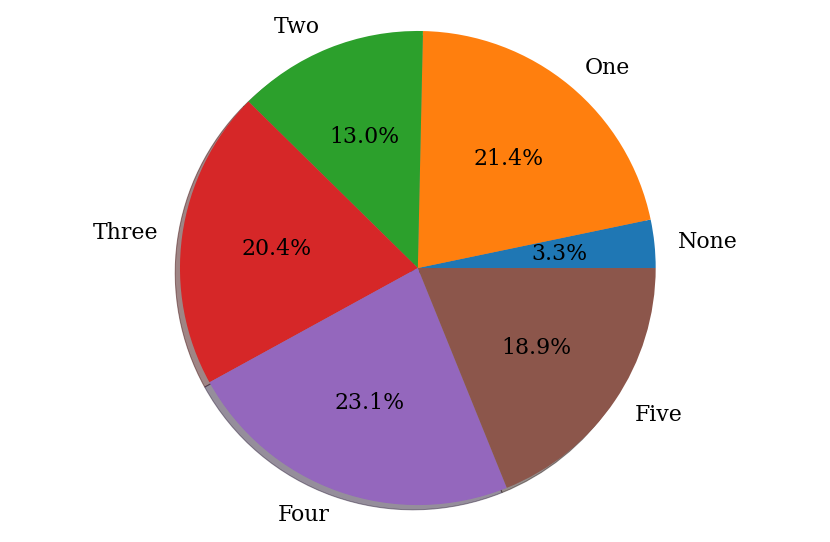

time: 516 ms (started: 2022-01-31 19:41:16 +02:00)


In [12]:
plt.rcParams["figure.figsize"] = (12,8)
font = {'family' : 'serif',
        'size'   :22}
plt.rc('font', **font)
sns.color_palette("colorblind")

with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\pievaccineoverlap.pdf') as export_pdf:

    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'None', 'One', 'Two', 'Three', 'Four', 'Five'
    sizes = [1040, 6775, 4105, 6466, 7320, 5989]
    #explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=0)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')

    plt.show()

In [ ]:


    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'None', 'One', 'Two', 'Three', 'Four', 'Five'
    sizes = [1040, 6775, 4105, 6466, 7320, 5989]
    #explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=0)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')

    plt.show()

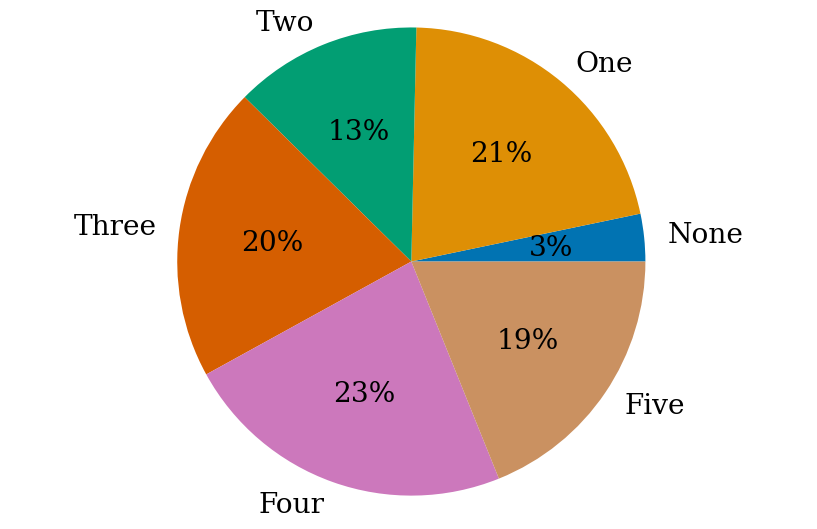

time: 390 ms (started: 2022-01-31 19:48:51 +02:00)


In [20]:
plt.rcParams["figure.figsize"] = (12,8)
font = {'family' : 'serif',
        'size'   :28}
plt.rc('font', **font)

with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\pievaccineoverlap_colorblind.pdf') as export_pdf:
    labels = 'None', 'One', 'Two', 'Three', 'Four', 'Five'
    sizes = [1040, 6775, 4105, 6466, 7320, 5989]
    #define Seaborn color palette to use
    colors = sns.color_palette("colorblind")

    #create pie chart
    plt.pie(sizes, labels = labels, colors = colors, autopct='%.0f%%')
    #fig1, ax1 = plt.subplots()
    #ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
     #       shadow=True, startangle=0)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

In [ ]:
vaccine.labels.value_counts()

In [ ]:
def m(y):
    for i in range(0, len(labels)):
        if (labels[i] == 0 ):
            return 100* (y/75634)
        else:
            return 100* (y/39001)
        
    
vaccines_names['overlap_countlabelwise'] = vaccines_names['Overlap_Count'].apply(m)

In [ ]:
vaccines_names['misinfo_percent'] = (100 * vaccines_names[vaccines_names.labels == 1]['Overlap_Count'] / 
                  vaccines_names[vaccines_names.labels == 1]['Overlap_Count'].sum())
vaccines_names['info_percent'] = (100 * vaccines_names[vaccines_names.labels == 0]['Overlap_Count'] / 
                  vaccines_names[vaccines_names.labels == 0]['Overlap_Count'].sum())

In [ ]:
vaccines_names['misinfo_percent'].fillna(0, inplace = True)
vaccines_names['info_percent'].fillna(0, inplace = True)

In [ ]:
a.dropna(inplace = True)

In [ ]:
b = pd.DataFrame(vaccines_names['info_percent'])
b.dropna(inplace = True)

In [ ]:
vaccines_names['misinfo_percent'] = vaccines_names['misinfo_percent'].round(decimals = 3)
vaccines_names['info_percent'] = vaccines_names['info_percent'].round(decimals = 3)

In [ ]:
sns.countplot(x = vaccines_names[vaccines_names.labels == 0]['Overlap_Count'])

In [ ]:
sns.countplot(x = vaccines_names[vaccines_names.labels == 1]['Overlap_Count'])

In [ ]:
vaccines_names.groupby(by = [ 'misinfo_percent', 'info_percent', 'Labels']).size()

In [ ]:
plt.rcParams["figure.figsize"] = (18,4)
font = {'family' : 'serif',
        'size'   : 16}

plt.rc('font', **font)
with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\Vaccine_names_overlap_label.pdf') as export_pdf:

    vaccines_names.groupby(by = [ 'misinfo_percent', 'info_percent', 'Labels']).size().plot(kind='bar',stacked=True, color=['Pink', 'DarkSeaGreen'])

    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    #plt.legend( ncol=3)
    plt.xticks(rotation = 0)
    #plt.gcf().set_size_inches(5, 3)
    #plt.legend(loc = 0)
    plt.xlabel('')
    #plt.gca().axes.get_xaxis().set_visible(False)
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (8,4)
font = {'family' : 'serif',
        'size'   : 16}

plt.rc('font', **font)
with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\Vaccine_names_overlap_unstacked.pdf') as export_pdf:

    vaccines_names.groupby(by = [ 'Overlap_Count', 'Labels']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=False, color=['Pink', 'DarkSeaGreen'])

    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    #plt.legend( ncol=3)
    plt.xticks(rotation = 0)
    #plt.gcf().set_size_inches(5, 3)
    #plt.legend(loc = 0)
    plt.xlabel('')
    #plt.gca().axes.get_xaxis().set_visible(False)
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

# emotions

In [ ]:
vaccine['emotions'] = vaccine['clean'].apply(lambda text: te.get_emotion(text))

In [ ]:
def emotions(x):
    b = 'null'
    m = max(x['Happy'], x['Angry'], x['Surprise'], x['Sad'], x['Fear'])
    if (m == x['Happy']):
        a = 'Happy'  
    elif (m == x['Angry']):
        a = 'Angry'
    elif (m == x['Surprise']):
        a = 'Surprise'
    elif (m == x['Sad']):
        a = 'Sad'
    elif (m == x['Fear']):
        a = 'Fear'
    return a

vaccine['emotions_class'] = vaccine['emotions'].apply(emotions)

In [ ]:
import matplotlib.ticker as mtick

vaccine.groupby(by = ['emotions_class', 'labels']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [ ]:
import plotly.graph_objects as go
import plotly.offline as pyo

In [ ]:
import matplotlib.ticker as mtick

vaccine.groupby(by = ['NN_count', 'labels']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [ ]:
import matplotlib.ticker as mtick
#plt.figure(figsize = (2,5))
font = {'family' : 'serif',
        'size'   : 14}

plt.rc('font', **font)

with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\Emotions.pdf') as export_pdf:
    

    vaccine.groupby(by = ['Labels', 'emotions_class']).size().groupby(level=0).apply(
        lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=False, color=['SlateGray', 'IndianRed', 'CadetBlue', 'PeachPuff', 'LightSalmon'])
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.xticks(rotation = 0)
    plt.xlabel('')
    #plt.gcf().legend()
    plt.gcf().set_size_inches(7, 3)
    #plt.legend(loc = 0)
    #plt.gca().axes.get_xaxis().set_visible(False)
    plt.legend(['Anger', 'Fear', 'Happiness', 'Sadness', 'Surprise'], bbox_to_anchor=(1,1), loc="upper left")
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

In [ ]:
vaccine.groupby(by = ['Labels', 'emotions_class']).size().groupby(level=0).apply(
        lambda x: 100 * x / x.sum()).unstack()

In [ ]:
pd.DataFrame(vaccine.groupby(by = ['Labels', 'emotions_class']).size())

In [ ]:
categories = ['Anger', 'Fear', 'Happiness', 'Sadness', 'Surprise']
categories = [*categories, categories[0]]

r_1 = [3.865, 32.524, 18.352, 12.862, 32.398]
r_2 = [4.467, 39.527, 12.910, 16.710, 26.387]
r_1 = [*r_1, r_1[0]]
r_2 = [*r_2, r_2[0]]

fig = go.Figure(
    data=[
        go.Scatterpolar(r=r_1, theta=categories, fill='toself', line={'color':'rgba(0, 128, 0, 0.4)'}, name='Non-Misleading'),
        go.Scatterpolar(r=r_2, theta=categories, fill='toself', line={'color':'rgba(220, 20, 60, 0.4)'}, name='Misleading'),
        #go.Scatterpolar(r=restaurant_3, theta=categories, name='Restaurant 3')
    ],
    layout=go.Layout(
        #title=go.layout.Title(text='Emotions'),
        polar={'radialaxis': {'visible': False}},
        #angularaxis = {'ticksuffix': 25},
        showlegend=False
    )
    
        
)
fig.update_layout(
    #title="Plot Title",
    #xaxis_title="X Axis Title",
    #yaxis_title="Y Axis Title",
    #legend_title="Legend Title",
    font=dict(
        family="serif",
        size=40,
        #color="RebeccaPurple"
    )
        )

pyo.plot(fig)
#fig.write_image("radar_emo.pdf")

In [ ]:
import matplotlib.ticker as mtick
#plt.figure(figsize = (2,5))
font = {'family' : 'serif',
        'size'   : 14}

plt.rc('font', **font)

with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\Emotions_stacked.pdf') as export_pdf:
    

    vaccine.groupby(by = ['Labels', 'emotions_class']).size().groupby(level=0).apply(
        lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, color=['SlateGray', 'IndianRed', 'CadetBlue', 'PeachPuff', 'LightSalmon'])
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.xticks(rotation = 0)
    plt.xlabel('')
    #plt.gcf().legend()
    plt.gcf().set_size_inches(7, 3)
    #plt.legend(loc = 0)
    #plt.gca().axes.get_xaxis().set_visible(False)
    plt.legend(['Anger', 'Fear', 'Happiness', 'Sadness', 'Surprise'], bbox_to_anchor=(1,1), loc="upper left")
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

In [ ]:
plt.savefig('save_as_a_png.pdf')

In [ ]:
sns.countplot(hue = vaccine['labels'], x = vaccine['emotions_class'])

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

In [ ]:
# Nouns, Pronouns and Adjectives
def pronoun_count(x):
    tokens = word_tokenize(x)
    tagged = nltk.pos_tag(tokens)
    counts = Counter(tag for word,tag in tagged)
    return counts['PRP']
#total = sum(counts.values())
#dict((word, float(count)/total) for word,count in counts.items())

In [ ]:
vaccine['PRP_count'] = vaccine['clean'].apply(pronoun_count)

In [ ]:
# Nouns, Pronouns and Adjectives
def noun_count(x):
    tokens = word_tokenize(x)
    tagged = nltk.pos_tag(tokens)
    counts = Counter(tag for word,tag in tagged)
    return counts['NN']

In [ ]:
vaccine['NN_count'] = vaccine['clean'].apply(noun_count)

In [ ]:
# Nouns, Pronouns and Adjectives
def adj_count(x):
    tokens = word_tokenize(x)
    tagged = nltk.pos_tag(tokens)
    counts = Counter(tag for word,tag in tagged)
    return counts['JJ']

In [ ]:
vaccine['JJ_count'] = vaccine['clean'].apply(adj_count)

# Pronouns

In [ ]:
negatives_prp = vaccine[vaccine['labels'] == 1]['PRP_count']
positives_prp = vaccine[vaccine['labels'] == 0]['PRP_count']

In [ ]:
plt.hist(negatives_prp)

In [ ]:
plt.hist(positives_prp)

In [ ]:
sns.displot( x = vaccine['PRP_count'], kind="kde", hue = vaccine['labels'], fill = True, palette = 'Set1')

# Stop words

In [ ]:
negatives_stop = vaccine[vaccine['labels'] == 1]['stop_words_count']
positives_stop = vaccine[vaccine['labels'] == 0]['stop_words_count']

In [ ]:
sns.displot( x = vaccine['stop_words_count'], kind="kde", hue = vaccine['labels'], fill = True, palette = 'Set1')

In [ ]:
sns.displot( x=vaccine['stop_words_count'], hue=vaccine['labels'], kind="ecdf")

# Nouns

In [ ]:
negatives_nn = vaccine[vaccine['labels'] == 1]['NN_count']
positives_nn = vaccine[vaccine['labels'] == 0]['NN_count']

In [ ]:
plt.hist(negatives_nn)

In [ ]:
plt.hist(positives_nn)

In [ ]:
sns.displot( x = vaccine['NN_count'], kind="kde", hue = vaccine['labels'], fill = True, palette = 'Set1')

In [ ]:
sns.displot( x=vaccine['NN_count'], hue=vaccine['labels'], kind="ecdf")

# Adjectives

In [ ]:
negatives_jj = vaccine[vaccine['labels'] == 1]['JJ_count']
positives_jj = vaccine[vaccine['labels'] == 0]['JJ_count']

In [ ]:
sns.displot( x = vaccine['JJ_count'], kind="kde", hue = vaccine['labels'], fill = True, palette = 'Set1')

In [ ]:
sns.displot( x = vaccine['JJ_count'], kind="kde", fill = True, palette = 'Set1')

In [ ]:
sns.displot( x=vaccine['JJ_count'], hue=vaccine['labels'], kind="ecdf")

In [ ]:
sns.boxplot(x=vaccine['JJ_count'], y=vaccine['labels'])

In [ ]:
import shifterator as sh

# WH words

In [ ]:
def wh_count(x):
    tokens = word_tokenize(x)
    tagged = nltk.pos_tag(tokens)
    counts = Counter(tag for word,tag in tagged)
    return (counts['WRB'] + counts['WP'] + counts['WP$'] + counts['WDT'])

In [ ]:
vaccine['WH_count'] = vaccine['clean'].apply(wh_count)

In [ ]:
vaccine['WH_count'].value_counts()

# Adverb

In [ ]:
def adverb_count(x):
    tokens = word_tokenize(x)
    tagged = nltk.pos_tag(tokens)
    counts = Counter(tag for word,tag in tagged)
    return (counts['RB'] + counts['RBR'] + counts['RBS'])

In [ ]:
vaccine['ADV_count'] = vaccine['clean'].apply(adverb_count)

In [ ]:
vaccine['ADV_count'].value_counts()

# Conjunction

In [ ]:
def conj_count(x):
    tokens = word_tokenize(x)
    tagged = nltk.pos_tag(tokens)
    counts = Counter(tag for word,tag in tagged)
    return (counts['CC'] + counts['IN'])

In [ ]:
vaccine['Conj_count'] = vaccine['clean'].apply(conj_count)

In [ ]:
vaccine['Conj_count'].value_counts()

# Verbs

In [ ]:
def verb_count(x):
    tokens = word_tokenize(x)
    tagged = nltk.pos_tag(tokens)
    counts = Counter(tag for word,tag in tagged)
    return (counts['VB'] + counts['VBD']+ counts['VBG']+ counts['VBN']+ counts['VBP']+ counts['VBZ'])

In [ ]:
vaccine['VERB_count'] = vaccine['clean'].apply(verb_count)

In [ ]:
vaccine['VERB_count'].value_counts()

# Determiner

In [ ]:
def dt_count(x):
    tokens = word_tokenize(x)
    tagged = nltk.pos_tag(tokens)
    counts = Counter(tag for word,tag in tagged)
    return (counts['DT'] + counts['PDT'])

In [ ]:
vaccine['DT_count'] = vaccine['clean'].apply(dt_count)

In [ ]:
vaccine['DT_count'].value_counts()

# Proper Nouns

In [ ]:
def PROPERNOUNS_count(x):
    tokens = word_tokenize(x)
    tagged = nltk.pos_tag(tokens)
    counts = Counter(tag for word,tag in tagged)
    return (counts['NNP'] + counts['NNPS'])

In [ ]:
vaccine['NNP_count'] = vaccine['clean'].apply(PROPERNOUNS_count)

In [ ]:
vaccine['NNP_count'].value_counts()

# Type token ratio:
For any paragraph of text, the no. of types is the number of unique tokens (words) contained in that paragraph while the no. of tokens is the total number of words in that paragraph. *
TTR= \left (\frac{\sum \left ( No. of Types \right )}{No.of Tokens}\right ) * 100

TTR is a measure of the lexical diversity (and some say, hence quality) of a text. Which makes total logical sense right?

In [ ]:
def TTR_count(x):
    document= re.sub(r'[^\w]', ' ', x)
    document=document.lower()
    tokens=word_tokenize(document)
    types=Counter(tokens)
    TTR= (len(types)/len(tokens))*100
    return TTR

In [ ]:
vaccine['TTR_count'] = vaccine['tweet'].apply(TTR_count)

In [ ]:
vaccine['TTR_count'].value_counts().head()

In [ ]:
with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\TTR.pdf') as export_pdf:
    
    sns.violinplot(vaccine.Labels, vaccine.TTR_count, palette = 'Set2')
    plt.xticks(rotation = 0)
    #plt.gcf().set_size_inches(5, 3)
    #plt.legend(loc = 0)
    #plt.gca().axes.get_xaxis().set_visible(False)
    #plt.legend(bbox_to_anchor=(1,1.2), loc="upper left")
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(vaccine[vaccine.Labels == 'Misleading']['TTR_count'], alpha=0.5, label="Misleading")
plt.hist(vaccine[vaccine.Labels == 'Non-Misleading']['TTR_count'], alpha=0.5, label="Non-Misleading")
plt.xlabel("Type-Token Ratio", size=14)
plt.ylabel("Count", size=14)
#plt.title("Multiple Histograms with Matplotlib")
plt.legend(loc='upper left')
#plt.savefig("overlapping_histograms_with_matplotlib_Python.png")

In [ ]:
with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\ADV.pdf') as export_pdf:
    
    sns.violinplot(vaccine.Labels, vaccine['ADV_count'], palette = 'Set2')
    plt.xticks(rotation = 0)
    #plt.gcf().set_size_inches(5, 3)
    #plt.legend(loc = 0)
    #plt.gca().axes.get_xaxis().set_visible(False)
    #plt.legend(bbox_to_anchor=(1,1.2), loc="upper left")
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

In [ ]:
with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\_ADV_normal.pdf') as export_pdf:
    
    sns.displot( x = undersampled['ADV_count'], kind="kde", hue = undersampled['Labels'], fill = False, bw_adjust=2, common_norm = False)
    plt.xticks(rotation = 0)
    #plt.gcf().set_size_inches(5, 3)
    #plt.legend(loc = 0)
    #plt.gca().axes.get_xaxis().set_visible(False)
    #plt.legend(bbox_to_anchor=(1,1.2), loc="upper left")
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

In [ ]:
with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\ADV_hist2.pdf') as export_pdf:
    
    #sns.displot(vaccine, x="ADV_count", hue="Labels", stat="density")
    sns.displot(vaccine, x="ADV_count", hue="Labels", multiple="dodge", bins = 15)

    
    plt.xticks(rotation = 0)
    #plt.gcf().set_size_inches(5, 3)
    #plt.legend(loc = 0)
    #plt.gca().axes.get_xaxis().set_visible(False)
    #plt.legend(bbox_to_anchor=(1,1.2), loc="upper left")
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

In [ ]:
with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\hashtags_hist.pdf') as export_pdf:
    
    #sns.displot(vaccine, x="ADV_count", hue="Labels", stat="density")
    sns.displot(vaccine, x="hashtags_count", hue="Labels", multiple="dodge", bins = 25, kind = "hist", stat = "density", common_norm = False)

    
    plt.xticks(rotation = 0)
    #plt.gcf().set_size_inches(5, 3)
    #plt.legend(loc = 0)
    #plt.gca().axes.get_xaxis().set_visible(False)
    #plt.legend(bbox_to_anchor=(1,1.2), loc="upper left")
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

In [ ]:
with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\ADV_hist2.pdf') as export_pdf:
    
    #sns.displot(vaccine, x="ADV_count", hue="Labels", stat="density")
    sns.displot(vaccine, x="ADV_count", kind = 'hist', hue="Labels"
                , bins = 10, stat="density",common_norm=False, element="step")

    
    plt.xticks(rotation = 0)
    #plt.gcf().set_size_inches(5, 3)
    #plt.legend(loc = 0)
    #plt.gca().axes.get_xaxis().set_visible(False)
    #plt.legend(bbox_to_anchor=(1,1.2), loc="upper left")
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (18,11)
font = {'family' : 'serif',
        'size'   : 20}
plt.rc('font', **font)
with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\DT_normal.pdf') as export_pdf:
    
    g = sns.displot( x = vaccine['DT_count'], kind="kde", hue = vaccine['Labels'], fill = False, bw_adjust=2.5, common_norm = False)
    g._legend.remove()
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation = 0)
    plt.gcf().set_size_inches(5, 3.5)
    #plt.legend(loc = 0)
    #plt.gca().axes.get_xaxis().set_visible(False)
    #plt.legend(bbox_to_anchor=(1,1.2), loc="upper left")
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (18,11)
font = {'family' : 'serif',
        'size'   : 20}
plt.rc('font', **font)
with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\Verbs_normal.pdf') as export_pdf:
    
    g = sns.displot( x = vaccine['VERB_count'], kind="kde", hue = vaccine['Labels'], fill = False, bw_adjust=2.5,common_norm = False)
    g._legend.remove()
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation = 0)
    plt.gcf().set_size_inches(5, 3.5)
    #plt.legend(loc = 0)
    #plt.gca().axes.get_xaxis().set_visible(False)
    #plt.legend(bbox_to_anchor=(1,1.2), loc="upper left")
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (18,11)
font = {'family' : 'serif',
        'size'   : 20}
plt.rc('font', **font)
with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\CNJ_normal.pdf') as export_pdf:
    
    g = sns.displot( x = vaccine['Conj_count'], kind="kde", hue = vaccine['Labels'], fill = False,bw_adjust=2.5, common_norm = False)
    g._legend.remove()
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation = 0)
    plt.gcf().set_size_inches(5, 3.5)
    #plt.legend(loc = 0)
    #plt.gca().axes.get_xaxis().set_visible(False)
    #plt.legend(bbox_to_anchor=(1,1.2), loc="upper left")
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (18,11)
font = {'family' : 'serif',
        'size'   : 20}
plt.rc('font', **font)
with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\stopwords.pdf') as export_pdf:
    
    g = sns.displot( x = vaccine['stop_words_count'], kind="kde", hue = vaccine['Labels'], fill = False, common_norm = False)
    g._legend.remove()
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation = 0)
    plt.gcf().set_size_inches(5, 3.5)
    #plt.legend(loc = 0)
    #plt.gca().axes.get_xaxis().set_visible(False)
    #plt.legend(bbox_to_anchor=(1,1.2), loc="upper left")
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (18,11)
font = {'family' : 'serif',
        'size'   : 20}
plt.rc('font', **font)
with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\PRP_normal.pdf') as export_pdf:
    
    g = sns.displot( x = vaccine['PRP_count'], kind="kde", hue = vaccine['Labels'], fill = False,bw_adjust=2.5, common_norm = False)
    g._legend.remove()
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation = 0)
    plt.gcf().set_size_inches(5, 3.5)
    #plt.legend(loc = 0)
    #plt.gca().axes.get_xaxis().set_visible(False)
    #plt.legend(bbox_to_anchor=(1,1.2), loc="upper left")
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

In [ ]:
with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\NNP_normal.pdf') as export_pdf:
    
    sns.displot( x = vaccine['NNP_count'], kind="kde", hue = vaccine['Labels'], fill = False, common_norm = False)
    plt.xticks(rotation = 0)
    #plt.gcf().set_size_inches(5, 3)
    #plt.legend(loc = 0)
    #plt.gca().axes.get_xaxis().set_visible(False)
    #plt.legend(bbox_to_anchor=(1,1.2), loc="upper left")
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (18,11)
font = {'family' : 'serif',
        'size'   : 20}
plt.rc('font', **font)
with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\JJ_normal.pdf') as export_pdf:
    
    g = sns.displot( x = vaccine['JJ_count'], kind="kde", hue = vaccine['Labels'], fill = False,bw_adjust=2.5, common_norm = False)
    g._legend.remove()
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation = 0)
    plt.gcf().set_size_inches(5, 3.5)
    #plt.legend(loc = 0)
    #plt.gca().axes.get_xaxis().set_visible(False)
    #plt.legend(bbox_to_anchor=(1,1.2), loc="upper left")
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (18,11)
font = {'family' : 'serif',
        'size'   : 20}
plt.rc('font', **font)
with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\WH_normal_with_labels.pdf') as export_pdf:
    
    g = sns.displot( x = vaccine['WH_count'], kind="kde", hue = vaccine['Labels'], fill = False, common_norm = False)
    #g._legend.remove()
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation = 0)
    plt.gcf().set_size_inches(5, 3.5)
    #plt.legend(loc = 0)
    #plt.gca().axes.get_xaxis().set_visible(False)
    #plt.legend(bbox_to_anchor=(1,1.2), loc="upper left")
    plt.gcf().legend(bbox_to_anchor=(0.6,1.4), loc="upper right")
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

In [ ]:
with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\WH.pdf') as export_pdf:
    
    sns.violinplot(vaccine.Labels, vaccine['WH_count'], palette = 'Set2')
    plt.xticks(rotation = 0)
    #plt.gcf().set_size_inches(5, 3)
    #plt.legend(loc = 0)
    #plt.gca().axes.get_xaxis().set_visible(False)
    #plt.legend(bbox_to_anchor=(1,1.2), loc="upper left")
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (18,11)
font = {'family' : 'serif',
        'size'   : 20}
plt.rc('font', **font)
with PdfPages(r'C:\Users\shakshi\Documents\RESEARCH\General_code\antivaccine_mostly\pdfs\TTR_count_normal.pdf') as export_pdf:
    
    g = sns.displot( x = vaccine['TTR_count'], kind="kde", hue = vaccine['Labels'], fill = False, common_norm = False)
    g._legend.remove()
    plt.xticks(rotation = 0)
    plt.gcf().set_size_inches(5, 3.5)
    #plt.legend(loc = 3)
   # plt.legend('')
    plt.xlabel('')
    plt.ylabel('')
    #plt.gca().axes.get_xaxis().set_visible(False)
    #plt.legend(bbox_to_anchor=(1,1.2), loc="upper right")
    plt.tight_layout()
    plt.gcf().subplots_adjust(bottom=0.04)
    export_pdf.savefig(bbox_inches='tight')
    plt.show()

# Shift Iterator

In [ ]:
vaccine[vaccine['labels'] == 1]['clean_modals_stopwords2'].to_csv('clean_text_for_shift_iterator_misinfo.txt', sep=' ', index=False)

In [ ]:
vaccine[vaccine['labels'] == 0]['clean_modals_stopwords2'].to_csv('clean_text_for_shift_iterator_info.txt', sep=' ', index=False)

In [ ]:
# Open the file in read mode
text = open("clean_text_for_shift_iterator_info.txt", "r")
  
# Create an empty dictionary
type2freq_1 = dict()
  
# Loop through each line of the file
for line in text:
    # Remove the leading spaces and newline character
    line = line.strip()
  
    # Convert the characters in line to 
    # lowercase to avoid case mismatch
    line = line.lower()
  
    # Split the line into words
    words = line.split(" ")
    filtered_sentence = []
    for w in words: 
        if w not in stopwords3: 
            filtered_sentence.append(w) 
  
    # Iterate over each word in line
    for word in filtered_sentence:
        # Check if the word is already in dictionary
        if word in type2freq_1:
            # Increment count of word by 1
            type2freq_1[word] = type2freq_1[word] + 1
        else:
            # Add the word to dictionary with count 1
            type2freq_1[word] = 1

In [ ]:
words = vaccine.clean[40].split(" ")
filtered_sentence = []
for w in words: 
    if w not in stopwords3: 
        filtered_sentence.append(w) 
filtered_sentence

In [ ]:
# Open the file in read mode
text = open("clean_text_for_shift_iterator_misinfo.txt", "r")
  
# Create an empty dictionary
type2freq_2 = dict()
  
# Loop through each line of the file
for line in text:
    # Remove the leading spaces and newline character
    line = line.strip()
  
    # Convert the characters in line to 
    # lowercase to avoid case mismatch
    line = line.lower()
  
    # Split the line into words
    words = line.split(" ")
    filtered_sentence = []
    for w in words: 
        if w not in stopwords3: 
            filtered_sentence.append(w) 
  
  
    # Iterate over each word in line
    for word in words:
        # Check if the word is already in dictionary
        if word in type2freq_2:
            # Increment count of word by 1
            type2freq_2[word] = type2freq_2[word] + 1
        else:
            # Add the word to dictionary with count 1
            type2freq_2[word] = 1

In [ ]:
sentiment_shift = sh.WeightedAvgShift(type2freq_1,
                                      type2freq_2,
                                      'labMT_English',
                                     stop_lens=[(4,6)])
sentiment_shift.get_shift_graph(system_names = ['Non-Misleading', 'Misleading'],
                                  top_n =  50, height = 9,show_total = True,
                                 show_plot = True,text_size_inset = True, detailed = True, filename = 'sentiments_MT.pdf',
                               cumulative_inset = True)

In [ ]:
sentiment_shift

In [ ]:
sentiment_shift = sh.WeightedAvgShift(type2freq_1,
                                      type2freq_2,
                                      'NRC-emotion_fear_English')
sentiment_shift.get_shift_graph(system_names = ['Non-Misleading', 'Misleading'],
                                  top_n =  50, height = 9,show_total = False,
                                 show_plot = False,text_size_inset = False, detailed = False, filename = 'sentiments_NCR.pdf',
                               cumulative_inset = False)

In [ ]:
sentiment_shift = sh.WeightedAvgShift(type2freq_1,
                                      type2freq_2,
                                      'NRC-emotion_surprise_English')
sentiment_shift.get_shift_graph(system_names = ['Non-Misleading', 'Misleading'],
                                 top_n =  50, height = 9,show_total = False,
                                 show_plot = False,text_size_inset = False, detailed = False, filename = 'emotions_NCR_surprise.pdf',
                               cumulative_inset = False)

In [ ]:
sentiment_shift = sh.WeightedAvgShift(type2freq_1,
                                      type2freq_2,
                                      'NRC-emotion_trust_English')
sentiment_shift.get_shift_graph(system_names = ['Non-Misleading', 'Misleading'],
                                 top_n =  50, height = 9,show_total = False,
                                 show_plot = False,text_size_inset = False, detailed = False, filename = 'emotions_NCR_trust.pdf',
                               cumulative_inset = False)

In [ ]:
sentiment_shift = sh.WeightedAvgShift(type2freq_1,
                                      type2freq_2,
                                      'NRC-emotion_anger_English')

In [ ]:
sentiment_shift.get_shift_graph(detailed=False,
                                system_names=['Non-Misleading', 'Misleading'])

In [ ]:
sentiment_shift = sh.WeightedAvgShift(type2freq_1,
                                      type2freq_2,
                                      'NRC-VAD_valence_English')
sentiment_shift.get_shift_graph(system_names = ['Non-Misleading', 'Misleading'],
                                 top_n =  50, height = 9,show_total = False,
                                 show_plot = False,text_size_inset = False, detailed = False, filename = 'NRC-VAD_valence.pdf',
                               cumulative_inset = False)

In [ ]:
sentiment_shift = sh.WeightedAvgShift(type2freq_1,
                                      type2freq_2,
                                      'NRC-VAD_Arousal_English')
sentiment_shift.get_shift_graph(system_names = ['Non-Misleading', 'Misleading'],
                                 top_n =  50, height = 9,show_total = False,
                                 show_plot = False,text_size_inset = False, detailed = False, filename = 'NRC-VAD_arousal.pdf',
                               cumulative_inset = False)

In [ ]:
sentiment_shift = sh.WeightedAvgShift(type2freq_1,
                                      type2freq_2,
                                      'NRC-VAD_Dominance_English')
sentiment_shift.get_shift_graph(system_names = ['', ''], title_fontsize = -12, xlabel = '', ylabel = '', show_score_diffs = 0,
                                 top_n =  30, height = 9,show_total = False, label_fontsize = 12,bar_width = 0.8, score_colors = { "all_pos_neg": "#000000",
            "all_pos_pos": "", "neg_s": "",
            "neg_s_neg_p": "",
            "neg_s_pos_p": "#FF0000",
            "neg_total": "#2E8B57",
            "pos_s": "",
            "pos_s_neg_p": "#000000",
            "pos_s_pos_p": "#000000",
            "pos_total": "#DC143C",
            "total": "#000000",},
                                remove_xticks = True,
                                remove_yticks = True,
                                
                                serif = True,
                                 show_plot = False,text_size_inset = False, detailed = False, filename = 'NRC-VAD_dominance.pdf',
                               cumulative_inset = False)

In [ ]:
proportion_shift = sh.ProportionShift(type2freq_1=type2freq_1,
                                      type2freq_2=type2freq_2)
proportion_shift.get_shift_graph(system_names = ['Non-Misleading', 'Misleading'],
                                 top_n =  30, height = 9,
                                 show_plot = False,text_size_inset = False, detailed = False, filename = 'NRC_proprtionshift.pdf',
                               cumulative_inset = False)

In [ ]:
import pickle
a_file = open("misinfo_freq_word.pkl", "wb")
#pickle.dump(type2freq_2, a_file)
a_file.close()

In [ ]:
a_file = open("misinfo_freq_word.pkl", "rb")
type2freq_2 = pickle.load(a_file)

In [ ]:
import pickle
a_file = open("info_freq_word.pkl", "wb")
#pickle.dump(type2freq_1, a_file)
a_file.close()

In [ ]:
a_file = open("info_freq_word.pkl", "rb")
type2freq_1 = pickle.load(a_file)

# Normalize frequencies

In [ ]:
for key, value in type2freq_1.items():
    type2freq_1[key] = value/total_words

In [ ]:
for key, value in type2freq_2.items():
    type2freq_2[key] = value/total_words

In [ ]:
for key, value in type2freq_1.items():
    type2freq_1[key] = (value/len(type2freq_1))*len(type2freq_2)

In [ ]:
type2freq_1

In [ ]:
entropy_shift = sh.EntropyShift(type2freq_1=type2freq_1,
                                type2freq_2=type2freq_2,
                                base=2)
entropy_shift.get_shift_graph(system_names = ['Non-Misleading', 'Misleading'],
                                 top_n =  30, height = 9,
                                 show_plot = False,text_size_inset = False, detailed = False, filename = 'NRC_entropyshift.pdf',
                               cumulative_inset = False)

In [ ]:
# Normalize
entropy_shift = sh.EntropyShift(type2freq_1=type2freq_1,
                                type2freq_2=type2freq_2,
                                base=2)
entropy_shift.get_shift_graph(system_names = ['Non-Misleading', 'Misleading'],
                                 top_n =  30, height = 9,
                                 show_plot = False,text_size_inset = False, detailed = False, filename = 'NRC_entropyshift_normalized.pdf',
                               cumulative_inset = False)

In [ ]:
# Normalize
entropy_shift = sh.EntropyShift(type2freq_1=type2freq_1,
                                type2freq_2=type2freq_2,
                                base=2)
entropy_shift.get_shift_graph(system_names = ['Non-Misleading', 'Misleading'],
                                 top_n =  30, height = 9,
                                 show_plot = False,text_size_inset = False, detailed = False, filename = 'NRC_entropyshift_normalized.pdf',
                               cumulative_inset = False)

In [ ]:
entropy_shift.type2score_1

In [ ]:
entropy_shift.type2shift_score

In [ ]:
entropy_shift = sh.EntropyShift(type2freq_1=type2freq_1,
                                type2freq_2=type2freq_2,
                                base=2,
                                alpha=0.5,
                               )
entropy_shift.get_shift_graph(system_names = ['Non-Misleading', 'Misleading'])

In [ ]:
jsd_shift = sh.JSDivergenceShift(type2freq_1=type2freq_1,
                                 type2freq_2=type2freq_2,
                                 weight_1=0.5,
                                 weight_2=0.5,
                                 base=2,
                                 alpha=1)
jsd_shift.get_shift_graph(system_names = ['Non-Misleading', 'Misleading'])

In [ ]:
rvs1 = vaccine[vaccine.labels == 0]['NN_count']
rvs2 = vaccine[vaccine.labels == 1]['NN_count']
stats.ks_2samp(rvs1, rvs2)

In [ ]:
rvs1 = vaccine[vaccine.labels == 0]['JJ_count']
rvs2 = vaccine[vaccine.labels == 1]['JJ_count']
stats.ks_2samp(rvs1, rvs2)

In [ ]:
rvs1 = vaccine[vaccine.labels == 0]['PRP_count']
rvs2 = vaccine[vaccine.labels == 1]['PRP_count']
stats.ks_2samp(rvs1, rvs2)

In [ ]:
rvs1 = vaccine[vaccine.labels == 0]['ADV_count']
rvs2 = vaccine[vaccine.labels == 1]['ADV_count']
stats.ks_2samp(rvs1, rvs2)

In [ ]:
rvs1 = vaccine[vaccine.labels == 0]['TTR_count']
rvs2 = vaccine[vaccine.labels == 1]['TTR_count']
stats.ks_2samp(rvs1, rvs2)

In [ ]:
rvs1 = vaccine[vaccine.labels == 0]['stop_words_count']
rvs2 = vaccine[vaccine.labels == 1]['stop_words_count']
stats.ks_2samp(rvs1, rvs2)

In [ ]:
rvs1 = vaccine[vaccine.labels == 0]['DT_count']
rvs2 = vaccine[vaccine.labels == 1]['DT_count']
stats.ks_2samp(rvs1, rvs2)

In [ ]:
rvs1 = vaccine[vaccine.labels == 0]['Conj_count']
rvs2 = vaccine[vaccine.labels == 1]['Conj_count']
stats.ks_2samp(rvs1, rvs2)

In [ ]:
vaccine['clean_modals_stopwords2'] = vaccine.string_stem_clean.apply(lambda x: ' '.join([word for word in x.split() if x not in stopwords2]))

In [ ]:
import scipy.stats as stats

def extended_tau(list_a, list_b):
    """ Calculate the extended Kendall tau from two lists. """
    ranks = join_ranks(create_rank(list_a), create_rank(list_b)).fillna(len(list_a))
    print(ranks[:20])
    dummy_df = pd.DataFrame([{'rank_a': len(list_a), 'rank_b': len(list_b)} for i in range(len(list_a)*2-len(ranks))])
    total_df = ranks.append(dummy_df)
    print(total_df)
    return scale_tau(len(list_a), stats.kendalltau(total_df['rank_a'], total_df['rank_b'])[0])

def scale_tau(length, value):
    """ Scale an extended tau correlation such that it falls in [-1, +1]. """
    n_0 = 2*length*(2*length-1)
    n_a = length*(length-1)
    n_d = n_0 - n_a
    min_tau = (2.*n_a - n_0) / (n_d)
    return 2*(value-min_tau)/(1-min_tau) - 1

def create_rank(a):
    """ Convert an ordered list to a DataFrame with ranks. """
    return pd.DataFrame(
                  zip(a, range(len(a))),
                  columns=['key', 'rank'])\
             .set_index('key')

def join_ranks(rank_a, rank_b):
    """ Join two rank DataFrames. """
    return rank_a.join(rank_b, lsuffix='_a', rsuffix='_b', how='outer')

In [ ]:
extended_tau(m, i)